In [19]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression, Ridge,LogisticRegression
from sklearn.dummy import DummyRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures,LabelEncoder
from imblearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as ImPipeline

from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, cross_val_score,GridSearchCV,cross_validate
from sklearn.impute import SimpleImputer
from sklearn.dummy import DummyClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC


from scipy import stats
from sklearn.metrics import recall_score,accuracy_score, precision_score, f1_score
from sklearn.metrics import ConfusionMatrixDisplay, classification_report
from sklearn.metrics import mean_squared_error
from imblearn.over_sampling import SMOTE
from sklearn.metrics import log_loss
from sklearn.metrics import RocCurveDisplay,roc_auc_score
import warnings

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.feature_selection import SelectKBest
import xgboost
import pickle

In [2]:
df_test = pd.read_csv('Data/Loan_Default_test_cleaned.csv', index_col=0)

In [3]:
df_test.shape

(125203, 45)

In [4]:
df_test.head()

,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,mths_since_last_major_derog,mths_since_last_record,mths_since_last_delinq,batch_enrolled,loan_amnt,funded_amnt,funded_amnt_inv,...,recoveries,collection_recovery_fee,collections_12_mths_ex_med,application_type,last_week_pay,acc_now_delinq,loan_status,Annual_Total_premium,PTI,LTI
member_id,,,,,,,,,,,,,,,,,,,,,
32157702,0.0,68305.0,21900.0,44.0,70.0,7.0,BAT2078974,2000,2000,2000.0,...,0.0,0.0,0.0,INDIVIDUAL,65th week,0.0,0,812.706742,0.013108,0.032258
59571650,0.0,36306.0,10500.0,50.0,37.0,50.0,BAT3873588,10000,10000,10000.0,...,0.0,0.0,0.0,INDIVIDUAL,22th week,0.0,0,3719.533417,0.053182,0.142980
33338943,0.0,15866.0,38640.0,98.0,70.0,57.0,BAT2078974,15000,15000,15000.0,...,0.0,0.0,0.0,INDIVIDUAL,65th week,0.0,0,4234.151626,0.044570,0.157895
19767045,0.0,153926.0,7000.0,50.0,70.0,50.0,BAT3461431,6500,6500,6500.0,...,0.0,0.0,0.0,INDIVIDUAL,56th week,0.0,1,2578.439439,0.053717,0.135417
1332598,0.0,0.0,10000.0,44.0,70.0,35.0,BAT5046385,7875,7875,7875.0,...,0.0,0.0,0.0,INDIVIDUAL,157th week,0.0,1,3288.382140,0.102762,0.246094


In [5]:
df_train = pd.read_csv('Data/Loan_Default_train_cleaned.csv', index_col=0)

In [6]:
df_train.shape

(375608, 45)

In [7]:
df_train.head()

,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,mths_since_last_major_derog,mths_since_last_record,mths_since_last_delinq,batch_enrolled,loan_amnt,funded_amnt,funded_amnt_inv,...,recoveries,collection_recovery_fee,collections_12_mths_ex_med,application_type,last_week_pay,acc_now_delinq,loan_status,Annual_Total_premium,PTI,LTI
member_id,,,,,,,,,,,,,,,,,,,,,
1485851,0.0,0.0,15000.0,44.0,70.0,31.0,BAT3372536,24000,24000,24000.0,...,1267.46,11.67,0.0,INDIVIDUAL,61th week,0.0,0,8318.641153,0.103983,0.300000
59728839,0.0,448556.0,153900.0,44.0,70.0,31.0,BAT3873588,25000,25000,25000.0,...,0.00,0.00,0.0,INDIVIDUAL,22th week,0.0,0,9034.434386,0.086042,0.238095
26348727,0.0,18255.0,37300.0,44.0,70.0,31.0,BAT2333412,11200,11200,11200.0,...,0.00,0.00,0.0,INDIVIDUAL,74th week,0.0,0,4235.829931,0.105896,0.280000
53714022,0.0,65274.0,49800.0,54.0,70.0,28.0,BAT1184694,15000,15000,15000.0,...,0.00,0.00,0.0,INDIVIDUAL,31th week,0.0,0,5495.544074,0.091592,0.250000
56449016,0.0,365694.0,19200.0,44.0,70.0,3.0,BAT3873588,10000,10000,10000.0,...,0.00,0.00,0.0,INDIVIDUAL,13th week,0.0,0,3928.077802,0.029314,0.074627


In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 375608 entries, 1485851 to 56428627
Data columns (total 45 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   tot_coll_amt                 375608 non-null  float64
 1   tot_cur_bal                  375608 non-null  float64
 2   total_rev_hi_lim             375608 non-null  float64
 3   mths_since_last_major_derog  375608 non-null  float64
 4   mths_since_last_record       375608 non-null  float64
 5   mths_since_last_delinq       375608 non-null  float64
 6   batch_enrolled               375608 non-null  object 
 7   loan_amnt                    375608 non-null  int64  
 8   funded_amnt                  375608 non-null  int64  
 9   funded_amnt_inv              375608 non-null  float64
 10  term                         375608 non-null  int64  
 11  int_rate                     375608 non-null  float64
 12  grade                        375608 non-null  obje

In [9]:
numcols = ['loan_amnt','emp_length','funded_amnt','int_rate', 'annual_inc','dti','open_acc','pub_rec','revol_bal','revol_util','total_acc','Annual_Total_premium','PTI','term','inq_last_6mths','LTI']

In [10]:
catcols = ['grade','sub_grade','home_ownership','verification_status', 'pymnt_plan','purpose','addr_state','initial_list_status','application_type']

In [11]:
X_tol_train = df_train.drop(['loan_status'],axis=1) 
X_test = df_test.drop(['loan_status'],axis=1)
y_tol_train = df_train['loan_status']
y_test = df_test['loan_status']

In [12]:
X_train, X_val, y_train, y_val = train_test_split(X_tol_train, y_tol_train, random_state=42, test_size=0.2)

In [13]:
subpipe_numerics =Pipeline(steps =[
    ('ss',StandardScaler())      
])
    
subpipe_cat =Pipeline([
    ('ohe',OneHotEncoder(sparse=False, handle_unknown='ignore')) 
])

In [14]:
CT = ColumnTransformer(transformers=[
    ('subpipe_num', subpipe_numerics,numcols),
    ('subpipe_cate', subpipe_cat,catcols)  
],remainder='drop')

In [15]:
subpipe_numerics1 =Pipeline(steps =[
    ('poly',PolynomialFeatures()),
    ('ss',StandardScaler())
])
    
subpipe_cat1 =Pipeline([
    ('ohe',OneHotEncoder(sparse=False, handle_unknown='ignore')) 
])

In [16]:
CT_poly = ColumnTransformer(transformers=[
    ('subpipe_num', subpipe_numerics1,numcols),
    ('subpipe_cate', subpipe_cat1,catcols)
],remainder='drop')

In [17]:
def model_eval(estimator,X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test,CT=CT):
    warnings.filterwarnings('ignore')
    model_name = type(estimator).__name__
    model = Pipeline(steps=[
    ('ct',CT),
    ('model',estimator)])

    model.fit(X_train,y_train)
    
    print(f'below are the model evaluation statistics of {model}')
    print(f' train_score : {round(model.score(X_train,y_train),4)}')
    print(f' test_score : {round(model.score(X_test,y_test),4)}')
    print(f' log loss on training dataset : {round(log_loss(y_train, model.predict_proba(X_train)),4)}')
    print(f' log loss on test dataset : {round(log_loss(y_test, model.predict_proba(X_test)),4)}')
    print(f'CrossValidation on training dataset : {cross_val_score(model,X_train,y_train,scoring="f1").mean()}')
    
    print('classification_report')
    print(classification_report(y_test, model.predict(X_test)))
    
    cm = ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)
    cm.ax_.set_title('Conf Matrix on Test Data')
    
    RocCurveDisplay.from_estimator(model, X_test, y_test)

In [18]:
def model_eff(estimator,X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test):
    warnings.filterwarnings('ignore')
    
    print(f'below are the model evaluation statistics of {estimator}')
    print(f' train_score : {round(estimator.score(X_train,y_train),4)}')
    print(f' test_score : {round(estimator.score(X_test,y_test),4)}')
    print(f' log loss on training dataset : {round(log_loss(y_train, estimator.predict_proba(X_train)),4)}')
    print(f' log loss on test dataset : {round(log_loss(y_test, estimator.predict_proba(X_test)),4)}')
    print(f'CrossValidation on training dataset : {cross_val_score(estimator,X_train,y_train,scoring="f1").mean()}')
    
    print('classification_report')
    print(classification_report(y_test, estimator.predict(X_test)))
    
    cm = ConfusionMatrixDisplay.from_estimator(estimator, X_test, y_test)
    cm.ax_.set_title('Conf Matrix on Test Data')
    
    RocCurveDisplay.from_estimator(estimator, X_test, y_test)

### Dummy Model

below are the model evaluation statistics of Pipeline(steps=[('ct',
                 ColumnTransformer(transformers=[('subpipe_num',
                                                  Pipeline(steps=[('ss',
                                                                   StandardScaler())]),
                                                  ['loan_amnt', 'emp_length',
                                                   'funded_amnt', 'int_rate',
                                                   'annual_inc', 'dti',
                                                   'open_acc', 'pub_rec',
                                                   'revol_bal', 'revol_util',
                                                   'total_acc',
                                                   'Annual_Total_premium',
                                                   'PTI', 'term',
                                                   'inq_last_6mths', 'LTI']),
                                           

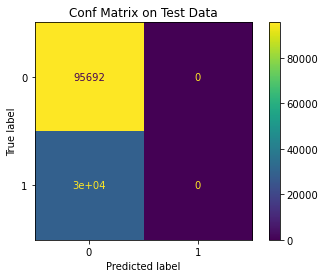

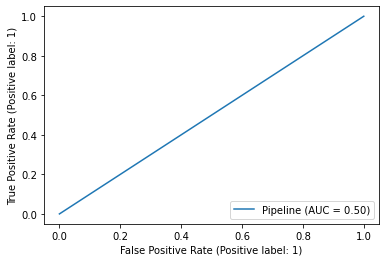

In [18]:
model_eval(DummyClassifier())

### Logistic Regression Models

below are the model evaluation statistics of Pipeline(steps=[('ct',
                 ColumnTransformer(transformers=[('subpipe_num',
                                                  Pipeline(steps=[('ss',
                                                                   StandardScaler())]),
                                                  ['loan_amnt', 'emp_length',
                                                   'funded_amnt', 'int_rate',
                                                   'annual_inc', 'dti',
                                                   'open_acc', 'pub_rec',
                                                   'revol_bal', 'revol_util',
                                                   'total_acc',
                                                   'Annual_Total_premium',
                                                   'PTI', 'term',
                                                   'inq_last_6mths', 'LTI']),
                                           

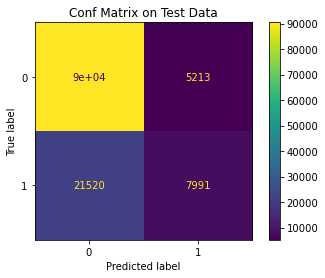

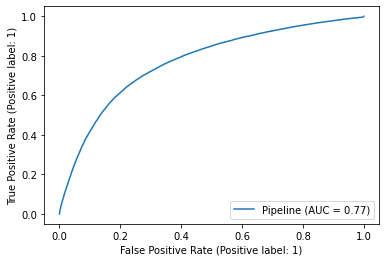

In [52]:
model_eval(LogisticRegression())

### Logistic Regression Grid Search

In [68]:
LRG_clf = LogisticRegression()
pipeline_LRG = Pipeline(steps=[
    ('ct',CT),
    ('classifier', LRG_clf)])

pipeline_LRG.fit(X_train, y_train)

Pipeline(steps=[('ct',
                 ColumnTransformer(transformers=[('subpipe_num',
                                                  Pipeline(steps=[('ss',
                                                                   StandardScaler())]),
                                                  ['loan_amnt', 'emp_length',
                                                   'funded_amnt', 'int_rate',
                                                   'annual_inc', 'dti',
                                                   'open_acc', 'pub_rec',
                                                   'revol_bal', 'revol_util',
                                                   'total_acc',
                                                   'Annual_Total_premium',
                                                   'PTI', 'term',
                                                   'inq_last_6mths', 'LTI']),
                                                 ('subpipe_cate',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['grade', 'sub_grade',
                                                   'home_ownership',
                                                   'verification_status',
                                                   'pymnt_plan', 'purpose',
                                                   'addr_state',
                                                   'initial_list_status',
                                                   'application_type'])])),
                ('classifier', LogisticRegression())])

In [74]:
pipeline_LRG.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'ct', 'classifier', 'ct__n_jobs', 'ct__remainder', 'ct__sparse_threshold', 'ct__transformer_weights', 'ct__transformers', 'ct__verbose', 'ct__verbose_feature_names_out', 'ct__subpipe_num', 'ct__subpipe_cate', 'ct__subpipe_num__memory', 'ct__subpipe_num__steps', 'ct__subpipe_num__verbose', 'ct__subpipe_num__ss', 'ct__subpipe_num__ss__copy', 'ct__subpipe_num__ss__with_mean', 'ct__subpipe_num__ss__with_std', 'ct__subpipe_cate__memory', 'ct__subpipe_cate__steps', 'ct__subpipe_cate__verbose', 'ct__subpipe_cate__ohe', 'ct__subpipe_cate__ohe__categories', 'ct__subpipe_cate__ohe__drop', 'ct__subpipe_cate__ohe__dtype', 'ct__subpipe_cate__ohe__handle_unknown', 'ct__subpipe_cate__ohe__max_categories', 'ct__subpipe_cate__ohe__min_frequency', 'ct__subpipe_cate__ohe__sparse', 'ct__subpipe_cate__ohe__sparse_output', 'classifier__C', 'classifier__class_weight', 'classifier__dual', 'classifier__fit_intercept', 'classifier__intercept_scaling', 'classifier__l1_rat

In [75]:
parameters = {'classifier__solver' : ['newton-cg', 'lbfgs', 'liblinear'],
              'classifier__penalty' : ['l1','l2'],
              'classifier__C' : [100, 10, 1.0, 0.1, 0.01]}

In [76]:
gs_logistic = GridSearchCV(
    estimator=pipeline_LRG,
    param_grid=parameters,
    cv=5,
    verbose=1
)

In [78]:
gs_logistic.fit(X_train,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('ct',
                                        ColumnTransformer(transformers=[('subpipe_num',
                                                                         Pipeline(steps=[('ss',
                                                                                          StandardScaler())]),
                                                                         ['loan_amnt',
                                                                          'emp_length',
                                                                          'funded_amnt',
                                                                          'int_rate',
                                                                          'annual_inc',
                                                                          'dti',
                                                                          'open_acc',
                                                                          'pub_rec',
                                                                          'revol_bal',
                                                                          'revol_util',
                                                                          'total_acc',
                                                                          'Annual_Total_premium',
                                                                          'PTI',
                                                                          'term',
                                                                          'inq_last_6mths',
                                                                          'LTI']),
                                                                        ('subpipe_cate',
                                                                         Pipeli...
                                                                                          OneHotEncoder(handle_unknown='ignore',
                                                                                                        sparse=False))]),
                                                                         ['grade',
                                                                          'sub_grade',
                                                                          'home_ownership',
                                                                          'verification_status',
                                                                          'pymnt_plan',
                                                                          'purpose',
                                                                          'addr_state',
                                                                          'initial_list_status',
                                                                          'application_type'])])),
                                       ('classifier', LogisticRegression())]),
             param_grid={'classifier__C': [100, 10, 1.0, 0.1, 0.01],
                         'classifier__penalty': ['l1', 'l2'],
                         'classifier__solver': ['newton-cg', 'lbfgs',
                                                'liblinear']},
             verbose=1)

In [79]:
gs_logistic.best_params_

{'classifier__C': 10,
 'classifier__penalty': 'l2',
 'classifier__solver': 'liblinear'}

In [86]:
gs_logistic_best=gs_logistic.best_estimator_

below are the model evaluation statistics of Pipeline(steps=[('ct',
                 ColumnTransformer(transformers=[('subpipe_num',
                                                  Pipeline(steps=[('ss',
                                                                   StandardScaler())]),
                                                  ['loan_amnt', 'emp_length',
                                                   'funded_amnt', 'int_rate',
                                                   'annual_inc', 'dti',
                                                   'open_acc', 'pub_rec',
                                                   'revol_bal', 'revol_util',
                                                   'total_acc',
                                                   'Annual_Total_premium',
                                                   'PTI', 'term',
                                                   'inq_last_6mths', 'LTI']),
                                           

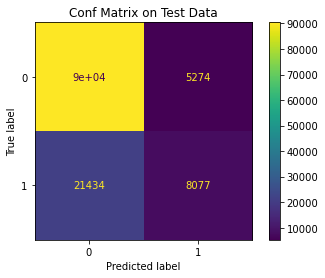

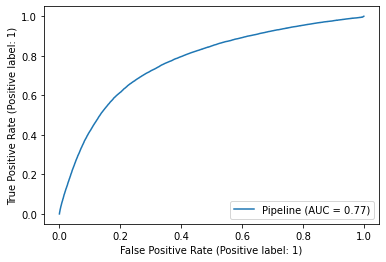

In [87]:
model_eff(gs_logistic_best)

### Logistic Regression with Polinomial Features

below are the model evaluation statistics of Pipeline(steps=[('ct',
                 ColumnTransformer(transformers=[('subpipe_num',
                                                  Pipeline(steps=[('poly',
                                                                   PolynomialFeatures()),
                                                                  ('ss',
                                                                   StandardScaler())]),
                                                  ['loan_amnt', 'emp_length',
                                                   'funded_amnt', 'int_rate',
                                                   'annual_inc', 'dti',
                                                   'open_acc', 'pub_rec',
                                                   'revol_bal', 'revol_util',
                                                   'total_acc',
                                                   'Annual_Total_premium',
                      

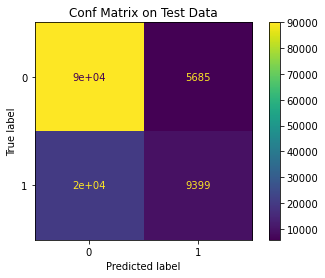

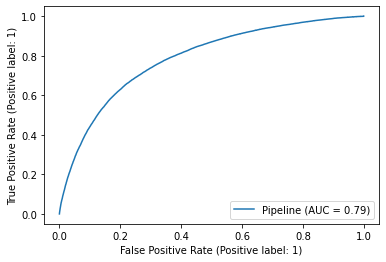

In [101]:
model_eval(LogisticRegression(),CT=CT_poly)

### Polinomial features with Logistic Regression Grid Search

In [102]:
LRGPoly_clf = LogisticRegression()
pipeline_LRGPoly = Pipeline(steps=[
    ('ct',CT_poly),
    ('polyclassifier', LRGPoly_clf)])

pipeline_LRGPoly.fit(X_train, y_train)

Pipeline(steps=[('ct',
                 ColumnTransformer(transformers=[('subpipe_num',
                                                  Pipeline(steps=[('poly',
                                                                   PolynomialFeatures()),
                                                                  ('ss',
                                                                   StandardScaler())]),
                                                  ['loan_amnt', 'emp_length',
                                                   'funded_amnt', 'int_rate',
                                                   'annual_inc', 'dti',
                                                   'open_acc', 'pub_rec',
                                                   'revol_bal', 'revol_util',
                                                   'total_acc',
                                                   'Annual_Total_premium',
                                                   'PTI', 'term',
                                                   'inq_last_6mths', 'LTI']),
                                                 ('subpipe_cate',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['grade', 'sub_grade',
                                                   'home_ownership',
                                                   'verification_status',
                                                   'pymnt_plan', 'purpose',
                                                   'addr_state',
                                                   'initial_list_status',
                                                   'application_type'])])),
                ('polyclassifier', LogisticRegression())])

In [103]:
pipeline_LRGPoly.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'ct', 'polyclassifier', 'ct__n_jobs', 'ct__remainder', 'ct__sparse_threshold', 'ct__transformer_weights', 'ct__transformers', 'ct__verbose', 'ct__verbose_feature_names_out', 'ct__subpipe_num', 'ct__subpipe_cate', 'ct__subpipe_num__memory', 'ct__subpipe_num__steps', 'ct__subpipe_num__verbose', 'ct__subpipe_num__poly', 'ct__subpipe_num__ss', 'ct__subpipe_num__poly__degree', 'ct__subpipe_num__poly__include_bias', 'ct__subpipe_num__poly__interaction_only', 'ct__subpipe_num__poly__order', 'ct__subpipe_num__ss__copy', 'ct__subpipe_num__ss__with_mean', 'ct__subpipe_num__ss__with_std', 'ct__subpipe_cate__memory', 'ct__subpipe_cate__steps', 'ct__subpipe_cate__verbose', 'ct__subpipe_cate__ohe', 'ct__subpipe_cate__ohe__categories', 'ct__subpipe_cate__ohe__drop', 'ct__subpipe_cate__ohe__dtype', 'ct__subpipe_cate__ohe__handle_unknown', 'ct__subpipe_cate__ohe__max_categories', 'ct__subpipe_cate__ohe__min_frequency', 'ct__subpipe_cate__ohe__sparse', 'ct__subpi

In [105]:
parameters = {'ct__subpipe_num__poly__degree':[1,2,3],
              'polyclassifier__solver':['liblinear','lbfgs'],
              'polyclassifier__max_iter':[10,100,500],
              'polyclassifier__C':[0.01,0.1,1],
              'polyclassifier__tol':[0.001,0.01,0.1] }

In [106]:
gs_logisticPoly = GridSearchCV(
    estimator=pipeline_LRGPoly,
    param_grid=parameters,
    cv=5,
    verbose=1
)

In [ ]:
gs_logisticPoly.fit(X_train,y_train)

Fitting 5 folds for each of 162 candidates, totalling 810 fits


below are the model evaluation statistics of Pipeline(steps=[('ct',
                 ColumnTransformer(transformers=[('subpipe_num',
                                                  Pipeline(steps=[('ss',
                                                                   StandardScaler())]),
                                                  ['loan_amnt', 'emp_length',
                                                   'funded_amnt', 'int_rate',
                                                   'annual_inc', 'dti',
                                                   'open_acc', 'pub_rec',
                                                   'revol_bal', 'revol_util',
                                                   'total_acc',
                                                   'Annual_Total_premium',
                                                   'PTI', 'term',
                                                   'inq_last_6mths', 'LTI']),
                                           

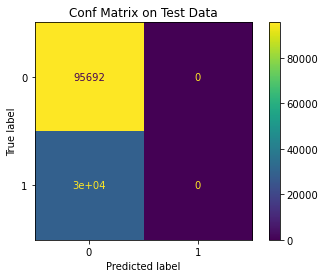

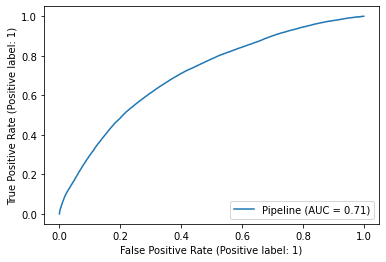

In [54]:
model_eval(RandomForestClassifier(max_depth=3))

### Gradient Boost Model

below are the model evaluation statistics of Pipeline(steps=[('ct',
                 ColumnTransformer(transformers=[('subpipe_num',
                                                  Pipeline(steps=[('ss',
                                                                   StandardScaler())]),
                                                  ['loan_amnt', 'emp_length',
                                                   'funded_amnt', 'int_rate',
                                                   'annual_inc', 'dti',
                                                   'open_acc', 'pub_rec',
                                                   'revol_bal', 'revol_util',
                                                   'total_acc',
                                                   'Annual_Total_premium',
                                                   'PTI', 'term',
                                                   'inq_last_6mths', 'LTI']),
                                           

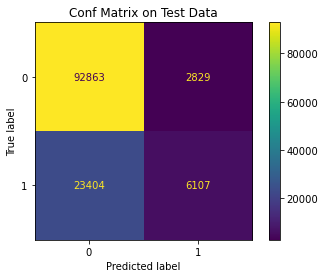

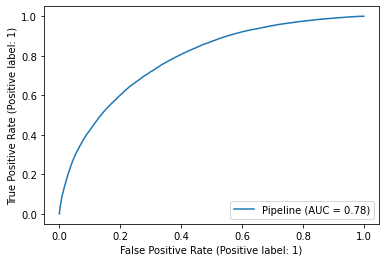

In [44]:
model_eval(GradientBoostingClassifier())

### XGBoost Model

below are the model evaluation statistics of Pipeline(steps=[('ct',
                 ColumnTransformer(transformers=[('subpipe_num',
                                                  Pipeline(steps=[('ss',
                                                                   StandardScaler())]),
                                                  ['loan_amnt', 'emp_length',
                                                   'funded_amnt', 'int_rate',
                                                   'annual_inc', 'dti',
                                                   'open_acc', 'pub_rec',
                                                   'revol_bal', 'revol_util',
                                                   'total_acc',
                                                   'Annual_Total_premium',
                                                   'PTI', 'term',
                                                   'inq_last_6mths', 'LTI']),
                                           

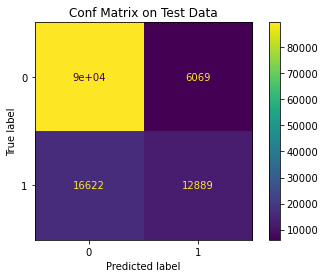

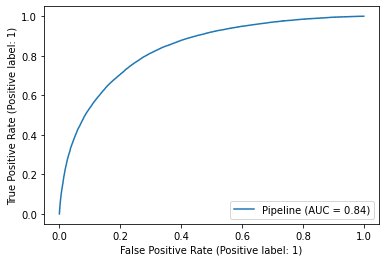

In [58]:
model_eval(XGBClassifier())

### XGBoost Model Grid Search

In [72]:
XGB_clf = XGBClassifier()
pipeline_XB = Pipeline(steps=[
    ('ct',CT),
    ('classifier', XGB_clf)])

pipeline_XB.fit(X_train, y_train)

Pipeline(steps=[('ct',
                 ColumnTransformer(transformers=[('subpipe_num',
                                                  Pipeline(steps=[('ss',
                                                                   StandardScaler())]),
                                                  ['loan_amnt', 'emp_length',
                                                   'funded_amnt', 'int_rate',
                                                   'annual_inc', 'dti',
                                                   'open_acc', 'pub_rec',
                                                   'revol_bal', 'revol_util',
                                                   'total_acc',
                                                   'Annual_Total_premium',
                                                   'PTI', 'term',
                                                   'inq_last_6mths', 'LTI']),
                                                 ('subpipe_cate',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncod...
                               colsample_bytree=1, gamma=0, gpu_id=-1,
                               importance_type='gain',
                               interaction_constraints='',
                               learning_rate=0.300000012, max_delta_step=0,
                               max_depth=6, min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=100,
                               n_jobs=0, num_parallel_tree=1, random_state=0,
                               reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
                               subsample=1, tree_method='exact',
                               validate_parameters=1, verbosity=None))])

In [73]:
pipeline_XB.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'ct', 'classifier', 'ct__n_jobs', 'ct__remainder', 'ct__sparse_threshold', 'ct__transformer_weights', 'ct__transformers', 'ct__verbose', 'ct__verbose_feature_names_out', 'ct__subpipe_num', 'ct__subpipe_cate', 'ct__subpipe_num__memory', 'ct__subpipe_num__steps', 'ct__subpipe_num__verbose', 'ct__subpipe_num__ss', 'ct__subpipe_num__ss__copy', 'ct__subpipe_num__ss__with_mean', 'ct__subpipe_num__ss__with_std', 'ct__subpipe_cate__memory', 'ct__subpipe_cate__steps', 'ct__subpipe_cate__verbose', 'ct__subpipe_cate__ohe', 'ct__subpipe_cate__ohe__categories', 'ct__subpipe_cate__ohe__drop', 'ct__subpipe_cate__ohe__dtype', 'ct__subpipe_cate__ohe__handle_unknown', 'ct__subpipe_cate__ohe__max_categories', 'ct__subpipe_cate__ohe__min_frequency', 'ct__subpipe_cate__ohe__sparse', 'ct__subpipe_cate__ohe__sparse_output', 'classifier__objective', 'classifier__base_score', 'classifier__booster', 'classifier__colsample_bylevel', 'classifier__colsample_bynode', 'classi

In [74]:
params ={
    'classifier__n_estimators':[75,100,125],
    'classifier__learning_rate':[0.1,0.3,0.4],
    'classifier__max_depth' :[4,7,10],
    'classifier__reg_lambda': [0,1]    
  }

In [75]:
gs = GridSearchCV(
    estimator=pipeline_XB,
    param_grid=params,
    cv=5,
    verbose=1
)

In [76]:
gs.fit(X_train,y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('ct',
                                        ColumnTransformer(transformers=[('subpipe_num',
                                                                         Pipeline(steps=[('ss',
                                                                                          StandardScaler())]),
                                                                         ['loan_amnt',
                                                                          'emp_length',
                                                                          'funded_amnt',
                                                                          'int_rate',
                                                                          'annual_inc',
                                                                          'dti',
                                                                          'open_acc',
                                                                          'pub_rec',
                                                                          'revol_bal',
                                                                          'revol_util',
                                                                          'total_acc',
                                                                          'Annual_Total_premium',
                                                                          'PTI',
                                                                          'term',
                                                                          'inq_last_6mths',
                                                                          'LTI']),
                                                                        ('subpipe_cate',
                                                                         Pipeli...
                                                      monotone_constraints='()',
                                                      n_estimators=100,
                                                      n_jobs=0,
                                                      num_parallel_tree=1,
                                                      random_state=0,
                                                      reg_alpha=0, reg_lambda=1,
                                                      scale_pos_weight=1,
                                                      subsample=1,
                                                      tree_method='exact',
                                                      validate_parameters=1,
                                                      verbosity=None))]),
             param_grid={'classifier__learning_rate': [0.1, 0.3, 0.4],
                         'classifier__max_depth': [4, 7, 10],
                         'classifier__n_estimators': [75, 100, 125],
                         'classifier__reg_lambda': [0, 1]},
             verbose=1)

In [77]:
gs.best_params_

{'classifier__learning_rate': 0.1,
 'classifier__max_depth': 10,
 'classifier__n_estimators': 125,
 'classifier__reg_lambda': 1}

In [78]:
gs_best=gs.best_estimator_

In [79]:
gs_train_score = round(gs_best.score(X_train,y_train),4)
gs_train_score

0.852

In [80]:
gs_test_score= round(gs_best.score(X_test,y_test),4)
gs_test_score

0.8202

In [81]:
gs_log_loss_train = round(log_loss(y_train, gs_best.predict_proba(X_train)),4)
gs_log_loss_test = round(log_loss(y_test, gs_best.predict_proba(X_test)),4)

print(f"""
Our fsm model's logloss on the train set is {gs_log_loss_train}. \n
Our fsm model's logloss on the test set is {gs_log_loss_test}

""")


Our fsm model's logloss on the train set is 0.3436. 

Our fsm model's logloss on the test set is 0.404




In [82]:
gs_cv = cross_val_score(gs_best, X_train, y_train,scoring = "f1")
gs_cv=round(gs_cv.mean(),4)
gs_cv

0.5214

In [79]:
y_hat = gs_best.predict(X_test)

gs_accuracy = round(accuracy_score(y_test, y_hat), 2)
gs_recall = round(recall_score(y_test, y_hat), 2)
gs_precision = round(precision_score(y_test, y_hat), 2)
gs_f1 = round(f1_score(y_test, y_hat), 2)

print(f"""
Our fsm_polymodel's accuracy on the test set is {gs_accuracy}. \n
Our fsm_polymodel's recall on the test set is {gs_recall} \n
Our fsm_polymodel's precision on the test set is {gs_precision} \n
Our fsm_polymodel's f1-score on the test is {gs_f1}.
""")


Our fsm_polymodel's accuracy on the test set is 0.82. 

Our fsm_polymodel's recall on the test set is 0.44 

Our fsm_polymodel's precision on the test set is 0.68 

Our fsm_polymodel's f1-score on the test is 0.54.



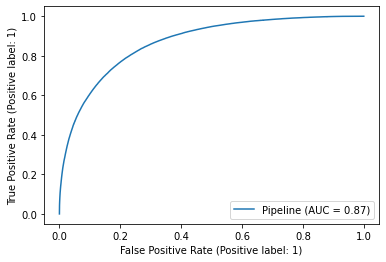

In [81]:
RocCurveDisplay.from_estimator(gs_best, X_train, y_train)

### Save the grid search XGBoost Model

In [84]:
filename = 'Model/Xgboost_model.sav'

In [85]:
pickle.dump(gs, open(filename, 'wb'))

In [86]:
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
result

0.8202199627804445

### Feature Importance

In [87]:
model_step = gs_best.named_steps['classifier']

In [88]:
importance = model_step.feature_importances_

In [89]:
for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.00252
Feature: 1, Score: 0.00258
Feature: 2, Score: 0.01473
Feature: 3, Score: 0.01969
Feature: 4, Score: 0.00233
Feature: 5, Score: 0.00734
Feature: 6, Score: 0.00374
Feature: 7, Score: 0.01193
Feature: 8, Score: 0.00234
Feature: 9, Score: 0.00350
Feature: 10, Score: 0.00350
Feature: 11, Score: 0.00292
Feature: 12, Score: 0.00214
Feature: 13, Score: 0.02992
Feature: 14, Score: 0.00689
Feature: 15, Score: 0.00374
Feature: 16, Score: 0.03649
Feature: 17, Score: 0.02873
Feature: 18, Score: 0.03162
Feature: 19, Score: 0.02009
Feature: 20, Score: 0.00559
Feature: 21, Score: 0.00787
Feature: 22, Score: 0.00379
Feature: 23, Score: 0.01416
Feature: 24, Score: 0.00730
Feature: 25, Score: 0.02943
Feature: 26, Score: 0.02561
Feature: 27, Score: 0.01982
Feature: 28, Score: 0.03609
Feature: 29, Score: 0.03174
Feature: 30, Score: 0.02926
Feature: 31, Score: 0.01596
Feature: 32, Score: 0.01401
Feature: 33, Score: 0.02473
Feature: 34, Score: 0.02186
Feature: 35, Score: 0.01952
Fe

<AxesSubplot:>

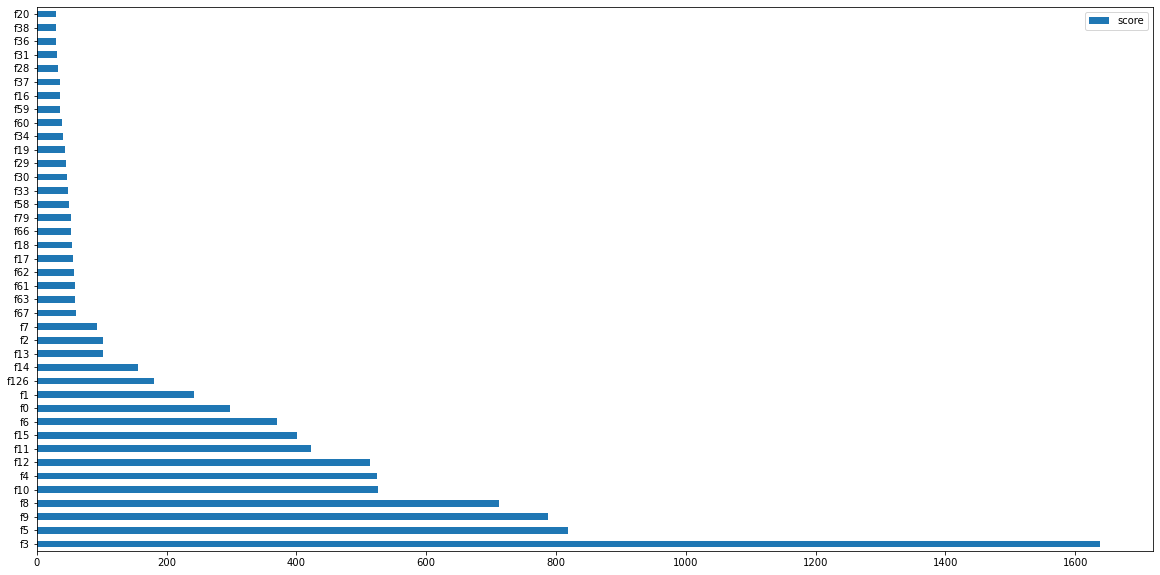

In [99]:
feature_important = model_step.get_booster().get_score(importance_type='weight')
keys = list(feature_important.keys())
values = list(feature_important.values())

data = pd.DataFrame(data=values, index=keys, columns=["score"]).sort_values(by = "score", ascending=False)
data.nlargest(40, columns="score").plot(kind='barh', figsize = (20,10)) ## plot top 40 features

### K-Neighbors Model

below are the model evaluation statistics of Pipeline(steps=[('ct',
                 ColumnTransformer(transformers=[('subpipe_num',
                                                  Pipeline(steps=[('ss',
                                                                   StandardScaler())]),
                                                  ['loan_amnt', 'emp_length',
                                                   'funded_amnt', 'int_rate',
                                                   'annual_inc', 'dti',
                                                   'open_acc', 'pub_rec',
                                                   'revol_bal', 'revol_util',
                                                   'total_acc',
                                                   'Annual_Total_premium',
                                                   'PTI', 'term',
                                                   'inq_last_6mths', 'LTI']),
                                           

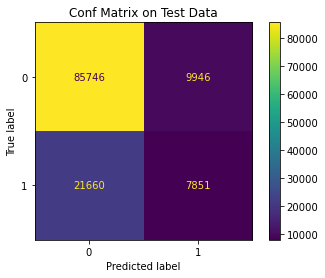

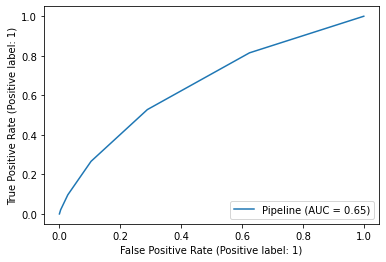

In [59]:
model_eval(KNeighborsClassifier())

below are the model evaluation statistics of Pipeline(steps=[('ct',
                 ColumnTransformer(transformers=[('subpipe_num',
                                                  Pipeline(steps=[('ss',
                                                                   StandardScaler())]),
                                                  ['loan_amnt', 'emp_length',
                                                   'funded_amnt', 'int_rate',
                                                   'annual_inc', 'dti',
                                                   'open_acc', 'pub_rec',
                                                   'revol_bal', 'revol_util',
                                                   'total_acc',
                                                   'Annual_Total_premium',
                                                   'PTI', 'term',
                                                   'inq_last_6mths', 'LTI']),
                                           

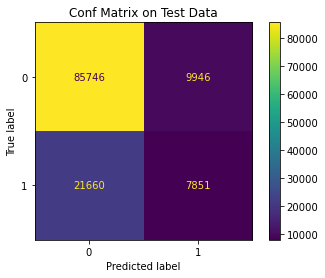

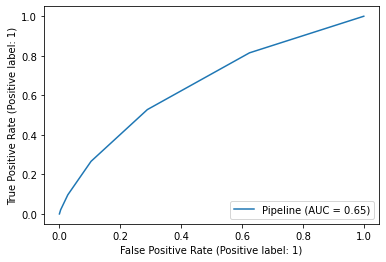

In [60]:
model_eval(KNeighborsClassifier(n_neighbors=5))

### Random Forest Model

below are the model evaluation statistics of Pipeline(steps=[('ct',
                 ColumnTransformer(transformers=[('subpipe_num',
                                                  Pipeline(steps=[('ss',
                                                                   StandardScaler())]),
                                                  ['loan_amnt', 'emp_length',
                                                   'funded_amnt', 'int_rate',
                                                   'annual_inc', 'dti',
                                                   'open_acc', 'pub_rec',
                                                   'revol_bal', 'revol_util',
                                                   'total_acc',
                                                   'Annual_Total_premium',
                                                   'PTI', 'term',
                                                   'inq_last_6mths', 'LTI']),
                                           

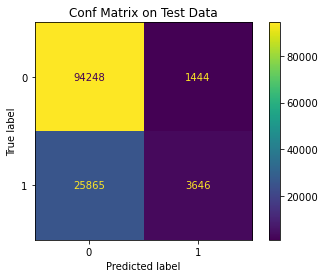

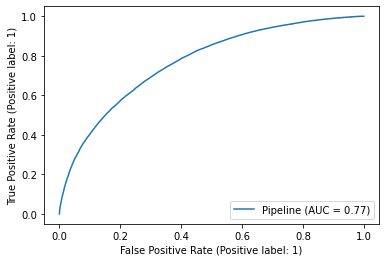

In [61]:
model_eval(RandomForestClassifier(min_samples_leaf=40, n_estimators=60))

### Support Vector Machine (SVM)

In [ ]:
model_eval(SVC())

## Models with SMOTE

### Random Forest with SMOTE

In [62]:
rf_clf = RandomForestClassifier(criterion='gini', bootstrap=True, random_state=100)
smote_sampler = SMOTE(random_state=9)
pipeline = Pipeline(steps=[
    ('ct',CT),
    ('smote', smote_sampler),
    ('classifier', rf_clf)])

pipeline.fit(X_train, y_train)

Pipeline(steps=[('ct',
                 ColumnTransformer(transformers=[('subpipe_num',
                                                  Pipeline(steps=[('ss',
                                                                   StandardScaler())]),
                                                  ['loan_amnt', 'emp_length',
                                                   'funded_amnt', 'int_rate',
                                                   'annual_inc', 'dti',
                                                   'open_acc', 'pub_rec',
                                                   'revol_bal', 'revol_util',
                                                   'total_acc',
                                                   'Annual_Total_premium',
                                                   'PTI', 'term',
                                                   'inq_last_6mths', 'LTI']),
                                                 ('subpipe_cate',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['grade', 'sub_grade',
                                                   'home_ownership',
                                                   'verification_status',
                                                   'pymnt_plan', 'purpose',
                                                   'addr_state',
                                                   'initial_list_status',
                                                   'application_type'])])),
                ('smote', SMOTE(random_state=9)),
                ('classifier', RandomForestClassifier(random_state=100))])

In [63]:
y_pred = pipeline.predict(X_test)

In [64]:
print(f"Recall: { round(recall_score(y_test, y_pred)*100, 4) }")
print(f"Precision: { round(precision_score(y_test, y_pred)*100, 4) }")
print(f"F1-Score: { round(f1_score(y_test, y_pred)*100, 4) }")
print(f"Accuracy score: { round(accuracy_score(y_test, y_pred)*100, 4) }")
print(f"AUC Score: { round(roc_auc_score(y_test, y_pred)*100, 4) }")

Recall: 34.1568
Precision: 58.0411
F1-Score: 43.0052
Accuracy score: 78.6603
AUC Score: 63.2708


### XG Boost with SMOTE

In [65]:
XB_clf = XGBClassifier()
smote_sampler = SMOTE(random_state=9)
pipeline_XB = Pipeline(steps=[
    ('ct',CT),
    ('smote', smote_sampler),
    ('classifier', XB_clf)])

pipeline_XB.fit(X_train, y_train)

Pipeline(steps=[('ct',
                 ColumnTransformer(transformers=[('subpipe_num',
                                                  Pipeline(steps=[('ss',
                                                                   StandardScaler())]),
                                                  ['loan_amnt', 'emp_length',
                                                   'funded_amnt', 'int_rate',
                                                   'annual_inc', 'dti',
                                                   'open_acc', 'pub_rec',
                                                   'revol_bal', 'revol_util',
                                                   'total_acc',
                                                   'Annual_Total_premium',
                                                   'PTI', 'term',
                                                   'inq_last_6mths', 'LTI']),
                                                 ('subpipe_cate',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncod...
                               colsample_bytree=1, gamma=0, gpu_id=-1,
                               importance_type='gain',
                               interaction_constraints='',
                               learning_rate=0.300000012, max_delta_step=0,
                               max_depth=6, min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=100,
                               n_jobs=0, num_parallel_tree=1, random_state=0,
                               reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
                               subsample=1, tree_method='exact',
                               validate_parameters=1, verbosity=None))])

below are the model evaluation statistics of Pipeline(steps=[('ct',
                 ColumnTransformer(transformers=[('subpipe_num',
                                                  Pipeline(steps=[('ss',
                                                                   StandardScaler())]),
                                                  ['loan_amnt', 'emp_length',
                                                   'funded_amnt', 'int_rate',
                                                   'annual_inc', 'dti',
                                                   'open_acc', 'pub_rec',
                                                   'revol_bal', 'revol_util',
                                                   'total_acc',
                                                   'Annual_Total_premium',
                                                   'PTI', 'term',
                                                   'inq_last_6mths', 'LTI']),
                                           

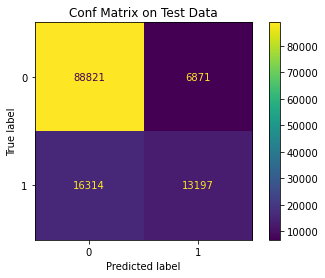

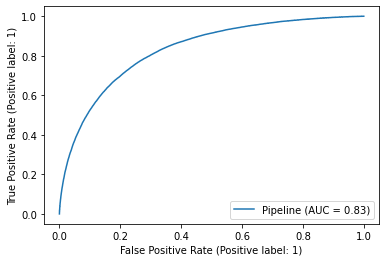

In [69]:
model_eff(estimator=pipeline_XB)